# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

##### The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.isnull().sum().sort_values()

age               0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
nr.employed       0
duration          0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
job               0
day_of_week       0
y                 0
dtype: int64

##### To predict if a client will subscribe the deposit.

<AxesSubplot:>

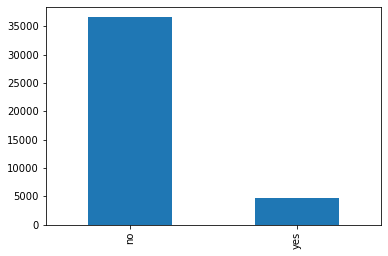

In [6]:
df['y'].value_counts().plot(kind='bar')

Based on above we can see the target distribution in given data is skewed / imbalanced

In [7]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [8]:
df_cleaned = df.copy()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

#### Tranformations

##### Target (y)

In [9]:
df_cleaned["y"] = df_cleaned["y"].replace("no", "0")
df_cleaned["y"] = df_cleaned["y"].replace("yes", "1")
df_cleaned["y"] = df_cleaned["y"].astype(int)

##### 'campaign','age','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m'

In [10]:
df_cleaned[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']] = MinMaxScaler().fit_transform(df_cleaned[['campaign','age','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']])

##### nr.employed

In [11]:
df_cleaned['nr.employed'] = StandardScaler().fit_transform(np.array(df_cleaned['nr.employed']).reshape(-1,1))

##### month

In [12]:
month_map = {
    'mar':'3',
    'apr':'4',
    'may':'5',
    'jun':'6',
    'jul':'7',
    'aug':'8',
    'sep':'9',
    'oct':'10',
    'nov':'11',
    'dec':'12'
}
df_cleaned['month']=df.month.map(month_map)
df_cleaned["month"] = df_cleaned["month"].astype(int)

##### day_of_week

In [13]:
day_of_week_map = {
    'mon':'1',
    'tue':'2',
    'wed':'3',
    'thu':'4',
    'fri':'5'
}
df_cleaned['day_of_week']=df.day_of_week.map(day_of_week_map)
df_cleaned["day_of_week"] = df_cleaned["day_of_week"].astype(int)

In [14]:
df_cleaned.to_csv('data/bank_1.csv',index=False)

In [15]:
df_cleaned = pd.read_csv('data/bank_1.csv')

##### job, education

In [16]:
df_cleaned["job"] = df_cleaned["job"].replace("admin.", "admin")
df_cleaned["job"] = df_cleaned["job"].replace("-", "_")

In [17]:
df_cleaned["education"] = df_cleaned["education"].replace("university.degree", "university_degree")
df_cleaned["education"] = df_cleaned["education"].replace("high.school", "high_school")
df_cleaned["education"] = df_cleaned["education"].replace("basic.9y", "basic_9y")
df_cleaned["education"] = df_cleaned["education"].replace("professional.course", "professional_course")
df_cleaned["education"] = df_cleaned["education"].replace("basic.4y", "basic_4y")
df_cleaned["education"] = df_cleaned["education"].replace("basic.6y", "basic_6y")

##### 'job', 'marital', 'education','default', 'housing', 'loan','contact','poutcome'

In [18]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['job', 'marital', 'education','default', 'housing', 'loan','contact','poutcome']),
    remainder='passthrough')

transformed = transformer.fit_transform(df_cleaned)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

In [19]:
transformed_df.columns = transformed_df.columns.str.replace('onehotencoder__' , '')
transformed_df.columns = transformed_df.columns.str.replace('remainder__' , '')


In [20]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   job_admin                      41188 non-null  float64
 1   job_blue-collar                41188 non-null  float64
 2   job_entrepreneur               41188 non-null  float64
 3   job_housemaid                  41188 non-null  float64
 4   job_management                 41188 non-null  float64
 5   job_retired                    41188 non-null  float64
 6   job_self-employed              41188 non-null  float64
 7   job_services                   41188 non-null  float64
 8   job_student                    41188 non-null  float64
 9   job_technician                 41188 non-null  float64
 10  job_unemployed                 41188 non-null  float64
 11  job_unknown                    41188 non-null  float64
 12  marital_divorced               41188 non-null 

In [21]:
df_cleaned = transformed_df.copy()

In [22]:
df_cleaned.to_csv('data/bank_2.csv',index=False)

In [23]:
df_cleaned = pd.read_csv('data/bank_2.csv')

##### duration

Dropping duration

In [24]:
del df_cleaned['duration']

In [25]:
df_cleaned.to_csv('data/bank_3.csv',index=False)

In [26]:
df_cleaned = pd.read_csv('data/bank_3.csv')

#### Feature Cleanup

In [27]:
df_cleaned.corr()

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job_admin,1.000000,-0.313313,-0.111417,-0.094595,-0.160892,-0.121502,-0.110021,-0.190063,-0.085748,-0.257516,...,0.005294,-0.102584,-0.025398,0.018888,-0.024572,-0.041840,0.032341,-0.023831,-0.023446,0.031426
job_blue-collar,-0.313313,1.000000,-0.103050,-0.087492,-0.148810,-0.112378,-0.101759,-0.175791,-0.079308,-0.238178,...,0.007334,-0.024191,0.065335,-0.054845,0.057264,0.075322,-0.101567,0.046775,0.063921,-0.074423
job_entrepreneur,-0.111417,-0.103050,1.000000,-0.031113,-0.052918,-0.039962,-0.036186,-0.062513,-0.028203,-0.084698,...,-0.001329,0.031213,0.019246,-0.013239,0.009363,0.009825,-0.032306,0.018744,0.024581,-0.016644
job_housemaid,-0.094595,-0.087492,-0.031113,1.000000,-0.044929,-0.033929,-0.030723,-0.053075,-0.023945,-0.071911,...,-0.011988,0.085403,-0.001649,-0.011569,0.036367,0.028335,0.035374,0.036392,0.028105,-0.006505
job_management,-0.160892,-0.148810,-0.052918,-0.044929,1.000000,-0.057708,-0.052255,-0.090272,-0.040726,-0.122309,...,-0.010201,0.062040,0.000254,0.006735,-0.016642,-0.025268,0.000784,-0.001590,-0.001475,-0.000419
job_retired,-0.121502,-0.112378,-0.039962,-0.033929,-0.057708,1.000000,-0.039462,-0.068171,-0.030756,-0.092365,...,-0.004719,0.440772,-0.072084,0.065113,-0.103678,-0.052251,0.087033,-0.102454,-0.129367,0.092221
job_self-employed,-0.110021,-0.101759,-0.036186,-0.030723,-0.052255,-0.039462,1.000000,-0.061730,-0.027849,-0.083637,...,0.004525,-0.001356,0.014307,-0.011231,0.001477,-0.005122,0.000592,0.007421,0.009519,-0.004663
job_services,-0.190063,-0.175791,-0.062513,-0.053075,-0.090272,-0.068171,-0.061730,1.000000,-0.048110,-0.144485,...,-0.003029,-0.065731,0.030573,-0.011885,0.019431,0.033282,-0.055561,0.014666,0.020629,-0.032301
job_student,-0.085748,-0.079308,-0.028203,-0.023945,-0.040726,-0.030756,-0.027849,-0.048110,1.000000,-0.065185,...,0.001535,-0.199749,-0.096367,0.104671,-0.139725,-0.062117,0.010029,-0.147551,-0.165365,0.093955
job_technician,-0.257516,-0.238178,-0.084698,-0.071911,-0.122309,-0.092365,-0.083637,-0.144485,-0.065185,1.000000,...,0.001473,-0.064383,0.004575,-0.017142,0.054268,-0.010849,0.054973,0.050793,0.052741,-0.006149


In [28]:
# vif
def vif(exogs, data):
    vif_dict = {}
    for exog in exogs:
        not_exog = [i for i in exogs if i!=exog]
        X,y = data[not_exog], data[exog]
        r_squared = LinearRegression().fit(X,y).score(X,y)
        if r_squared<1.0:
            vif = 1 / (1-r_squared)
            vif_dict[exog] = vif
    df_vif = pd.DataFrame({"VIF":vif_dict})
    return df_vif

vif(df_cleaned.columns,df_cleaned).sort_values(by = "VIF", ascending = False)

,VIF
euribor3m,88.244073
emp.var.rate,47.304189
nr.employed,34.509961
pdays,12.434911
cons.price.idx,9.398216
previous,5.903053
cons.conf.idx,2.955494
contact_telephone,2.703108
month,1.998409
campaign,1.676895


In [29]:
del df_cleaned['euribor3m']

In [30]:
vif(df_cleaned.columns,df_cleaned).sort_values(by = "VIF", ascending = False)

,VIF
emp.var.rate,29.585110
nr.employed,15.645307
pdays,12.434952
cons.price.idx,8.927707
previous,5.899206
contact_telephone,2.466513
cons.conf.idx,1.942294
campaign,1.676765
month,1.483359
y,1.246662


In [31]:
del df_cleaned['emp.var.rate']

In [32]:
vif(df_cleaned.columns,df_cleaned).sort_values(by = "VIF", ascending = False)

,VIF
pdays,12.429748
previous,5.861909
nr.employed,2.295162
cons.price.idx,2.287673
contact_telephone,2.067162
campaign,1.676486
month,1.450474
cons.conf.idx,1.381542
y,1.237299
age,1.029286


In [33]:
del df_cleaned['pdays']

In [34]:
vif(df_cleaned.columns,df_cleaned).sort_values(by = "VIF", ascending = False)

,VIF
previous,5.189571
nr.employed,2.293735
cons.price.idx,2.287444
contact_telephone,2.066967
campaign,1.676114
month,1.450144
cons.conf.idx,1.378930
y,1.234972
age,1.029230
day_of_week,1.002771


In [35]:
df_cleaned.to_csv('data/bank_4.csv',index=False)

In [36]:
df_cleaned = pd.read_csv('data/bank_4.csv')

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [37]:
X,y = df_cleaned.drop('y', axis = 1), df_cleaned.y

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42,stratify = df.y)

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [40]:
y_test.value_counts(normalize = True)

0.0    0.887346
1.0    0.112654
Name: y, dtype: float64

In [41]:
y_train.value_counts(normalize = True)

0.0    0.887346
1.0    0.112654
Name: y, dtype: float64

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [42]:
start = time.time()
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
stop = time.time()
lgr_fit_time = stop - start
lgr_fit_time

0.07487797737121582

### Problem 9: Score the Model

What is the accuracy of your model?

In [43]:
lgr_train_score = lgr.score(X_train,y_train)
lgr_train_score

0.898222783334952

In [44]:
lgr_test_score = lgr.score(X_test,y_test)
lgr_test_score

0.9007477906186268

In [109]:
lgr_imp_dict = {
    'Column':X.columns,
    'Coeff':lgr.coef_[0]}
lgr_imp_df = pd.DataFrame(lgr_imp_dict)
lgr_imp_df.sort_values(by='Coeff',ascending=False).head(5)

,Column,Coeff
36,poutcome_success,0.235762
43,cons.conf.idx,0.140033
42,cons.price.idx,0.100133
5,job_retired,0.085150
24,default_no,0.063233


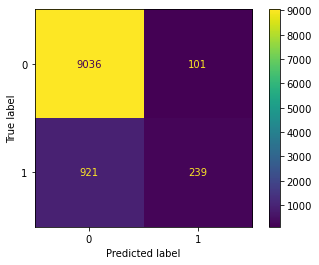

In [45]:
lgr_preds = lgr.predict(X_test)
confusion_mat = confusion_matrix(y_test, lgr_preds, labels=lgr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['0', '1'])
disp.plot()
plt.show()

#### Weighted Logistic Regression

In [46]:
start = time.time()
lgr_w = LogisticRegression(class_weight='balanced')
lgr_w.fit(X_train, y_train)
stop = time.time()
lgr_w_fit_time = stop - start
lgr_w_fit_time

0.09950375556945801

In [47]:
lgr_w_train_score = lgr_w.score(X_train,y_train)
lgr_w_train_score

0.7781878216956395

In [48]:
lgr_w_test_score = lgr_w.score(X_test,y_test)
lgr_w_test_score

0.7836262989220161

In [110]:
lgr_w_imp_dict = {
    'Column':X.columns,
    'Coeff':lgr_w.coef_[0]}
lgr_w_imp_df = pd.DataFrame(lgr_w_imp_dict)
lgr_w_imp_df.sort_values(by='Coeff',ascending=False).head(5)

,Column,Coeff
36,poutcome_success,0.236848
42,cons.price.idx,0.110818
5,job_retired,0.104515
43,cons.conf.idx,0.089578
24,default_no,0.053197


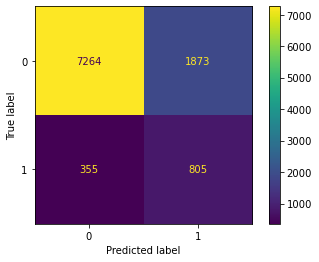

In [49]:
lgr_w_preds = lgr_w.predict(X_test)
confusion_mat = confusion_matrix(y_test, lgr_w_preds, labels=lgr_w.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['0', '1'])
disp.plot()
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### KNN

In [50]:
start = time.time()
knn =  KNeighborsClassifier().fit(X_train, y_train)
stop = time.time()
knn_fit_time = stop - start
knn_fit_time

0.004384040832519531

In [51]:
knn_train_score = knn.score(X_train,y_train)
knn_train_score

0.9105241008708038

In [52]:
knn_test_score = knn.score(X_test,y_test)
knn_test_score

0.8931727687676022

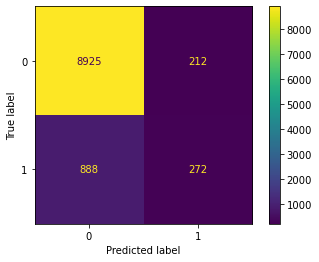

In [53]:
knn_preds = knn.predict(X_test)
confusion_mat = confusion_matrix(y_test, knn_preds, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['0', '1'])
disp.plot()
plt.show()

#### Decision Tree

In [54]:
start = time.time()
dt =  DecisionTreeClassifier().fit(X_train, y_train)
stop = time.time()
dt_fit_time = stop - start
dt_fit_time

0.15347003936767578

In [55]:
dt_train_score = dt.score(X_train,y_train)
dt_train_score

0.9944320352206144

In [56]:
dt_test_score = dt.score(X_test,y_test)
dt_test_score

0.841313003787511

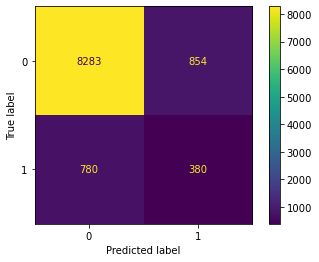

In [57]:
dt_preds = dt.predict(X_test)
confusion_mat = confusion_matrix(y_test, dt_preds, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['0', '1'])
disp.plot()
plt.show()

#### SVM

In [58]:
start = time.time()
svc =  SVC().fit(X_train, y_train)
stop = time.time()
svc_fit_time = stop - start
svc_fit_time

75.72347807884216

In [59]:
svc_train_score = svc.score(X_train,y_train)
svc_train_score

0.9020426661487164

In [60]:
svc_test_score = svc.score(X_test,y_test)
svc_test_score

0.9001650966300865

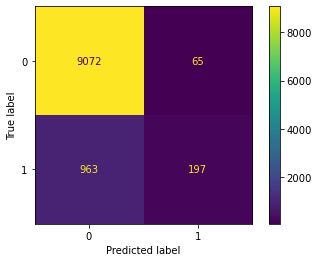

In [62]:
svc_preds = svc.predict(X_test)
confusion_mat = confusion_matrix(y_test, svc_preds, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['0', '1'])
disp.plot()
plt.show()

In [130]:
res_dict = {
    'Model':['Logistic Regression','KNN','Decision Tree','SVC'],
    'Train Time':[lgr_fit_time,knn_fit_time,dt_fit_time,svc_fit_time],
    'Train Accuracy':[lgr_train_score,knn_train_score,dt_train_score,svc_train_score],
    'Test Accuracy':[lgr_test_score,knn_test_score,dt_test_score,svc_test_score]}
results_df = pd.DataFrame(res_dict)
results_df.sort_values(by='Test Accuracy',ascending=False)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.074878,0.898223,0.900748
3,SVC,75.723478,0.902043,0.900165
1,KNN,0.004384,0.910524,0.893173
2,Decision Tree,0.153470,0.994432,0.841313


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Dropping few more features

In [64]:
df_cleaned.corr().query('y<0')['y'].sort_values()

nr.employed             -0.354678
poutcome_nonexistent    -0.193507
contact_telephone       -0.144773
cons.price.idx          -0.136211
default_unknown         -0.099293
job_blue-collar         -0.074423
age                     -0.066357
education_basic_9y      -0.045135
marital_married         -0.043398
job_services            -0.032301
education_basic_6y      -0.023517
job_entrepreneur        -0.016644
housing_no              -0.011085
education_basic_4y      -0.010798
marital_divorced        -0.010608
education_high_school   -0.007452
job_housemaid           -0.006505
job_technician          -0.006149
job_self-employed       -0.004663
loan_yes                -0.004466
default_yes             -0.003041
loan_unknown            -0.002270
housing_unknown         -0.002270
job_management          -0.000419
job_unknown             -0.000151
Name: y, dtype: float64

In [65]:
del df_cleaned['nr.employed']

In [66]:
df_cleaned.corr().query('y>0')['y'].sort_values()

education_professional_course    0.001003
loan_no                          0.005123
marital_unknown                  0.005211
education_illiterate             0.007246
day_of_week                      0.010051
housing_yes                      0.011743
job_unemployed                   0.014752
education_unknown                0.021430
campaign                         0.030399
job_admin                        0.031426
poutcome_failure                 0.031799
month                            0.037187
education_university_degree      0.050364
marital_single                   0.054133
cons.conf.idx                    0.054878
job_retired                      0.092221
job_student                      0.093955
default_no                       0.099344
previous                         0.230181
poutcome_success                 0.316269
y                                1.000000
Name: y, dtype: float64

In [67]:
del df_cleaned['poutcome_success']

In [68]:
df_cleaned.corr().query('y>0')['y'].sort_values()

education_professional_course    0.001003
loan_no                          0.005123
marital_unknown                  0.005211
education_illiterate             0.007246
day_of_week                      0.010051
housing_yes                      0.011743
job_unemployed                   0.014752
education_unknown                0.021430
campaign                         0.030399
job_admin                        0.031426
poutcome_failure                 0.031799
month                            0.037187
education_university_degree      0.050364
marital_single                   0.054133
cons.conf.idx                    0.054878
job_retired                      0.092221
job_student                      0.093955
default_no                       0.099344
previous                         0.230181
y                                1.000000
Name: y, dtype: float64

In [69]:
del df_cleaned['previous']

#### GridSearch Logistic Regression

In [70]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [1.0, 0.1, 0.01]
params = dict(solver=solvers,penalty=penalty,C=c_values)

start = time.time()
grid_lgr = GridSearchCV(estimator=model, param_grid=params)
grid_result = grid_lgr.fit(X_train, y_train)
stop = time.time()
gs_lgr_fit_time = stop - start
print("Fit time = ",gs_lgr_fit_time)

Fit time =  69.82814431190491


In [71]:
grid_lgr.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [72]:
gs_lgr_train_score = grid_lgr.best_score_
gs_lgr_train_score

0.8987084199130807

In [122]:
gs_lgr_test_score = grid_lgr.score(X_test, y_test)
gs_lgr_test_score

0.899970865300573

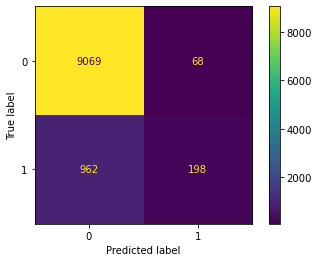

In [95]:
gs_lgr_preds = grid_lgr.predict(X_test)
confusion_mat = confusion_matrix(y_test, gs_lgr_preds, labels=grid_lgr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['0', '1'])
disp.plot()
plt.show()

#### GridSearch KNN

In [74]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
params = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

start = time.time()
grid_knn = GridSearchCV(estimator=model, param_grid=params)
grid_result = grid_knn.fit(X_train, y_train)
stop = time.time()
gs_knn_fit_time = stop - start
print("Fit time = ",gs_knn_fit_time)

Fit time =  990.9668900966644


In [75]:
grid_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

In [76]:
gs_knn_train_score = grid_knn.best_score_
gs_knn_train_score

0.8968955878763328

In [77]:
gs_knn_test_score = grid_knn.score(X_test, y_test)
gs_knn_test_score

0.899291055647276

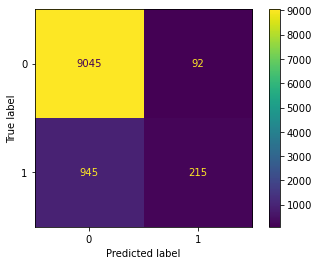

In [94]:
gs_knn_preds = grid_knn.predict(X_test)
confusion_mat = confusion_matrix(y_test, gs_knn_preds, labels=grid_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['0', '1'])
disp.plot()
plt.show()

#### GridSearch Decision Tree

In [80]:
model = DecisionTreeClassifier()

splitter = ["best","random"]
max_depth = range(1, 21, 2)
min_samples_leaf = range(1, 11, 2)

params = dict(splitter=splitter,max_depth=max_depth,min_samples_leaf=min_samples_leaf)

start = time.time()
grid_dt = GridSearchCV(estimator=model, param_grid=params)
grid_result = grid_dt.fit(X_train, y_train)
stop = time.time()
gs_dt_fit_time = stop - start
print("Fit time = ",gs_dt_fit_time)

Fit time =  28.713449001312256


In [81]:
grid_dt.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'splitter': 'random'}

In [82]:
gs_dt_train_score = grid_dt.best_score_
gs_dt_train_score

0.8999061347264261

In [83]:
gs_dt_test_score = grid_dt.score(X_test, y_test)
gs_dt_test_score

0.9011362532776537

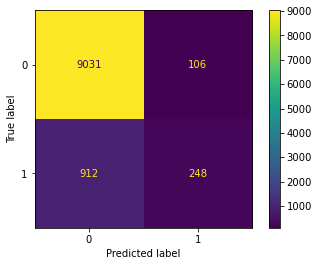

In [93]:
gs_dt_preds = grid_dt.predict(X_test)
confusion_mat = confusion_matrix(y_test, gs_dt_preds, labels=grid_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['0', '1'])
disp.plot()
plt.show()

#### GridSearch SVM

In [84]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [1.0, 0.1, 0.01]
params = dict(kernel=kernel,C=C)

start = time.time()
grid_svm = GridSearchCV(estimator=model, param_grid=params)
grid_result = grid_svm.fit(X_train, y_train)
stop = time.time()
gs_svm_fit_time = stop - start
print("Fit time = ",gs_svm_fit_time)

Fit time =  1108.7877037525177


In [85]:
grid_svm.best_params_

{'C': 0.01, 'kernel': 'poly'}

In [86]:
gs_svm_train_score = grid_svm.best_score_
gs_svm_train_score

0.8980933341247997

In [87]:
gs_svm_test_score = grid_svm.score(X_test, y_test)
gs_svm_test_score

0.8995824026415461

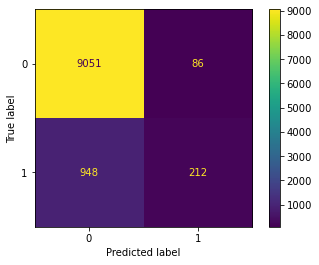

In [92]:
gs_svm_preds = grid_svm.predict(X_test)
confusion_mat = confusion_matrix(y_test, gs_svm_preds, labels=grid_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat ,display_labels = ['0', '1'])
disp.plot()
plt.show()

In [127]:
gs_res_dict = {
    'Model':['Logistic Regression','KNN','Decision Tree','SVC'],
    'Train Time':[gs_lgr_fit_time,gs_knn_fit_time,gs_dt_fit_time,gs_svm_fit_time],
    'Train Accuracy':[gs_lgr_train_score,gs_knn_train_score,gs_dt_train_score,gs_svm_train_score],
    'Test Accuracy':[gs_lgr_test_score,gs_knn_test_score,gs_dt_test_score,gs_svm_test_score]}
gs_results_df = pd.DataFrame(gs_res_dict)
gs_results_df.sort_values(by='Test Accuracy',ascending=False)

,Model,Train Time,Train Accuracy,Test Accuracy
2,Decision Tree,28.713449,0.899906,0.901136
0,Logistic Regression,69.828144,0.898708,0.899971
3,SVC,1108.787704,0.898093,0.899582
1,KNN,990.966890,0.896896,0.899291


### Observations

#### Base model performance

In [131]:
results_df.sort_values(by='Test Accuracy',ascending=False)

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.074878,0.898223,0.900748
3,SVC,75.723478,0.902043,0.900165
1,KNN,0.004384,0.910524,0.893173
2,Decision Tree,0.153470,0.994432,0.841313


#### Best model performance (using grid search)

In [129]:
gs_results_df.sort_values(by='Test Accuracy',ascending=False)

,Model,Train Time,Train Accuracy,Test Accuracy
2,Decision Tree,28.713449,0.899906,0.901136
0,Logistic Regression,69.828144,0.898708,0.899971
3,SVC,1108.787704,0.898093,0.899582
1,KNN,990.966890,0.896896,0.899291


From above observation, even though Logistic Regression trumped in basic form , DecisionTree classifier does best overall. The decision tree classifer 
performed best with max_depth = 5 / min_samples_leaf= 5 and splitter= random.

Due to lack of computation, we could not try more options for different hyper parameters , so we can run grid search for wider range of hyper parameters.
